# Laboratorio 1
## Data Science
### 20768 Axel López
### 18797 Leonel Contreras 

In [1]:
# importamos los paquetes necesarios
import pandas as pd
import numpy
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [2]:
# leemos los datos 
datos = pd.read_csv("risk_factors_cervical_cancer.csv")

In [3]:
# usamos el metodo head para ver los datos
datos.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# vemos los tipos de datos de cada columna del dataframe
print(datos.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

Posterior a la lectura del archivo csv, analizamos el tipo de dato de cada columna. Vemos que la mayoría de las columnas tienen sus valores como un objeto de tipo object. Por ende, es necesario cambiar dicho tipo de dato a un tipo de dato numérico, e.g. a un float.

In [5]:
# guardamos los nombres de las columnas en una lista
column_names_list = datos.columns.tolist()
# vemos los nombres 
column_names_list

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

In [6]:
datos = datos.applymap(lambda x: np.nan if x == '?' else x)

Debido a que varias columnas tienen su tipo de dato como object, estas columnas aceptan el valor '?' como un string. Por ende, es necesario -utilizando el código anterior- cambiar dichas entrads con valor '?' a np.nan.

In [7]:
datos.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


Podemos apreciar que se realizó exitosamente el cambio de dichas entradas con '?' por np.nan.

In [8]:
unique_values = datos['Age'].unique()
print(unique_values)

[18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]


In [9]:
# vemos los valores unicos de cada columna
for name in column_names_list:
    unique_values = datos[name].unique()
    unique_set = set(unique_values)
    print(name+": ")
    print(unique_set)
    
        

Age: 
{13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 59, 70, 79, 84}
Number of sexual partners: 
{'7.0', '3.0', '10.0', '28.0', '5.0', '15.0', '9.0', '1.0', '2.0', '4.0', '6.0', '8.0', nan}
First sexual intercourse: 
{'12.0', '21.0', '15.0', '17.0', '19.0', '14.0', '26.0', '18.0', '20.0', '29.0', '24.0', '22.0', '10.0', '25.0', '11.0', '23.0', nan, '16.0', '13.0', '28.0', '32.0', '27.0'}
Num of pregnancies: 
{'7.0', '0.0', '3.0', '11.0', '10.0', '5.0', '1.0', '2.0', '4.0', '6.0', '8.0', nan}
Smokes: 
{'0.0', '1.0', nan}
Smokes (years): 
{'0.5', '3.0', '12.0', '21.0', '15.0', '19.0', '1.266972909', '7.0', '14.0', '34.0', '5.0', '18.0', '37.0', '6.0', '8.0', '20.0', '0.0', '10.0', '22.0', '24.0', '0.16', '9.0', '4.0', '11.0', nan, '16.0', '13.0', '28.0', '32.0', '1.0', '2.0'}
Smokes (packs/year): 
{'0.1', '0.025', '0.5', '7.5', '12.0', '0.32', '3.0', '1.3', '1.6', '0.05', '21

Para determinar las variables categóricas que están en el dataframe, utilizamos el método .unique(). Dicho método permite extraer los valores únicos en cada columna del dataframe; con dichos valores únicos, podemos determinar que una columna corresponde a una variable categórica si sus únicos valores son: 0,1 o NaN. 

Con esto en mente, determinamos que las variables categóricas en el dataframe son:

variables_categoricas = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
             'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
             'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
             'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
             'Schiller', 'Citology', 'Biopsy']

In [10]:
# creamos un nuevo dataframe en el cual cambiamos todos los tipos de datos a float
df = pd.DataFrame()
for name in column_names_list:
    df[name] = datos[name].astype(float)

In [11]:
# usamos el metodo head para visualizar el nuevo dataframe
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# verificamos que todas las columnas tienen ahora tipo float
print(df.dtypes)

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [13]:
# creamos una lista con los nombres de las columnas que determinamos como variables categoricas
variables_categoricas = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
             'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
             'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
             'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
             'Schiller', 'Citology', 'Biopsy']

In [14]:
# usamos el metodo .pop() para quitar las columnas de las variables categoricas del dataframe
for name in variables_categoricas:
    df.pop(name)

In [15]:
# guardamos los nombres de las columnas en una lista
column_names_list_df = df.columns.tolist()
# vemos los nombres 
column_names_list_df

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives (years)',
 'IUD (years)',
 'STDs (number)',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis']

In [16]:
# vemos las columnas y los repectivos tipos de datos de las columnas restantes en el dataframe
print(df.dtypes)

Age                                 float64
Number of sexual partners           float64
First sexual intercourse            float64
Num of pregnancies                  float64
Smokes (years)                      float64
Smokes (packs/year)                 float64
Hormonal Contraceptives (years)     float64
IUD (years)                         float64
STDs (number)                       float64
STDs: Number of diagnosis           float64
STDs: Time since first diagnosis    float64
STDs: Time since last diagnosis     float64
dtype: object


In [17]:
# visalizamos los datos
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,34.0,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,52.0,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0.0,NaN,NaN
4,46.0,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0.0,NaN,NaN


In [18]:
# usamos el metodo describe para describir los datos
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,750.000000,741.000000,753.000000,858.000000,71.000000,71.000000
mean,26.820513,2.527644,16.995300,2.275561,1.219721,0.453144,2.256419,0.514804,0.176627,0.087413,6.140845,5.816901
std,8.497948,1.667760,2.803355,1.447414,4.089017,2.226610,3.764254,1.943089,0.561993,0.302545,5.895024,5.755271
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,4.000000,3.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,8.000000,7.500000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,3.000000,22.000000,22.000000


Debido a que los valores NaN no son utilizables en el PCA, se debe eliminar o sustituir esos datos. Al ver que se tienen muchos datos NaN, no es posible eliminarlos por lo que se reemplazararán estos valores por la moda de cada columna correspondiente.

In [20]:
#Se recorre todo el dataframe y se reemplaza cada valor NaN por la correspondiente moda de cada columna.

#Se recorre cada columnad del DataFrame
for columna in df.columns:
    #Se encuentra la moda de cada columna
    moda = df[columna].mode()[0]
    #Se reemplazan los valores NaN por su respectiva moda
    df[columna].fillna(moda, inplace=True)

Al analizar las variables, se pudo observar que las variables categorícas pueden ser incluidad dentro del PCA así que se transforman.

### Test de Esfericidad de Barret


In [29]:
chi_cuadrado, p_valor = calculate_bartlett_sphericity(df)
chi_cuadrado, p_valor

(5405.821237200187, 0.0)

Al realizar el test de esfericidad de Barret, se obtuvo que el valor p es menor a 0.05, por lo que se rechaza la hipótesis nula y se puede decir que hay correlación entre todas la variables.

### Índice KMO

In [30]:
kmo,kmo_modelo = calculate_kmo(df)
kmo_modelo

0.5977591281180009

El índice es mayor a 0.5, por lo que la adecuación muestral para un análisis factorial es aceptable. Probablemente esto nos indique que se tendrá buenos resultados haciendo PCA.

### Análisis de Componentes Principales

In [24]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(df)

modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data = modelo_pca.components_,
    columns = df.columns,
    index = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12']
)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis
PC1,0.108677,0.077419,0.012913,0.102415,0.147952,0.107273,0.049418,0.045964,0.458223,0.483428,0.502000,0.487763
PC2,0.478157,0.187425,0.074214,0.410442,0.457557,0.427360,0.264396,0.170161,-0.163234,-0.171710,-0.096874,-0.076797
PC3,-0.420232,0.255044,-0.410207,-0.268203,0.422524,0.473134,-0.273705,-0.183856,0.021246,0.024325,-0.051119,-0.058296
PC4,-0.090784,0.377759,-0.693798,0.341616,-0.230014,-0.263650,0.164185,0.315898,-0.037085,-0.006219,0.013239,0.015636
PC5,0.021872,-0.187876,0.055780,-0.045855,0.069870,0.055110,-0.552241,0.798037,0.047305,0.041014,-0.048488,-0.054654
PC6,0.178894,0.811160,0.354269,-0.085762,-0.137984,-0.141089,-0.362508,-0.075695,-0.002119,0.004863,-0.025038,-0.020296
PC7,0.026945,0.004317,0.016940,0.139600,0.012384,-0.026115,0.085797,-0.050998,0.546100,0.440135,-0.454867,-0.519456
PC8,0.109615,-0.217946,-0.137791,0.609402,0.014825,-0.075652,-0.604263,-0.417189,-0.060702,0.003947,0.023832,0.027124
PC9,0.679823,-0.093630,-0.418992,-0.474276,0.180529,-0.258165,-0.111386,-0.119760,0.031648,0.019120,-0.022811,-0.026547
PC10,0.259441,-0.039160,-0.143609,-0.080922,-0.692127,0.644983,-0.058513,-0.039608,0.001751,0.060441,0.002309,-0.016969


A partir de estos resultados, puedes concluir que existe una estructura subyacente en tus datos que los componentes principales han capturado. Los primeros componentes principales (especialmente PC1, PC2 y PC3) parecen capturar la mayor parte de la variabilidad en los datos, y podrían ser usados para reducir la dimensionalidad de los datos sin perder mucha información.

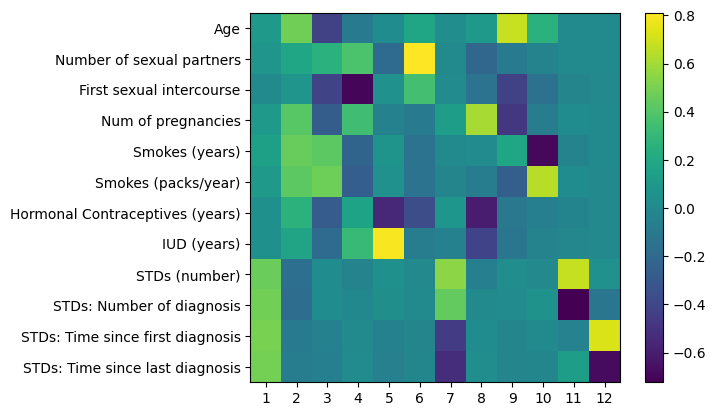

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar()

In [26]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.26054136 0.17222736 0.13166368 0.09244718 0.08201102 0.07269572
 0.06640212 0.06254506 0.02645355 0.02190822 0.00793415 0.00317059]


Text(0, 0.5, 'Por. varianza explicada')

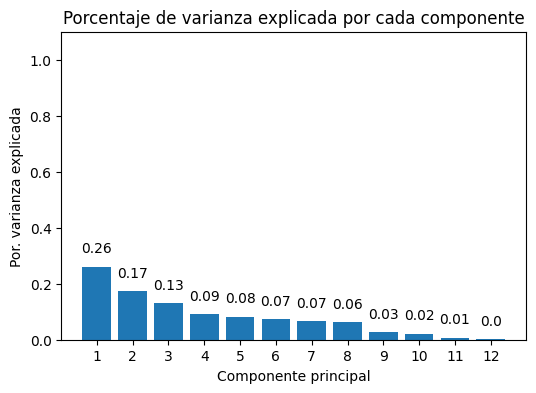

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.26054136 0.43276871 0.56443239 0.65687957 0.73889059 0.81158631
 0.87798843 0.94053349 0.96698704 0.98889526 0.99682941 1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

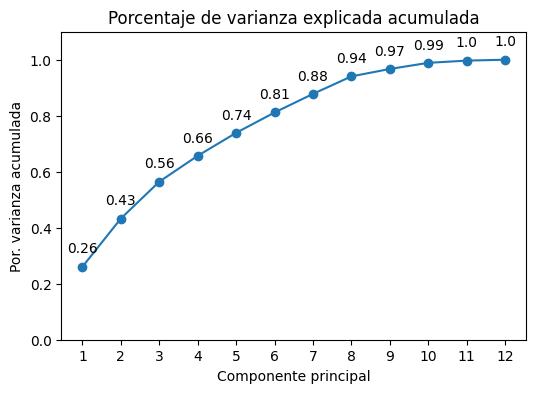

In [28]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')